# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keyw import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

City processed: airai
City processed: mataura
City processed: dikson
City processed: luderitz
City processed: mount gambier
City processed: bambous virieux
City processed: maragogi
City processed: portland
City processed: mangai
City processed: kavieng
City processed: tiszasuly
City processed: tuktoyaktuk
City processed: leningradskiy
City processed: manokwari
City processed: jamestown
City processed: avarua
City processed: albany
City processed: asahikawa
City processed: yozgat
City processed: ushuaia
City processed: borba
City processed: mastung
City processed: tourlaville
City processed: fairbanks
City processed: punta arenas
City processed: carnarvon
City NOT found: taolanaro
City processed: marsh harbour
City processed: sao joao da barra
City processed: shingu
City processed: sinnamary
City processed: langxiang
City processed: ponta do sol
City processed: araouane
City processed: kapaa
City processed: tiksi
City processed: nhulunbuy
City processed: vaini
City processed: hun
City p

City processed: ancud
City processed: baruun-urt
City processed: kruisfontein
City NOT found: amderma
City processed: moron
City processed: doha
City processed: bhag
City processed: neryungri
City processed: husavik
City processed: berbera
City NOT found: paradwip
City processed: chernyshevskiy
City processed: asau
City processed: taltal
City processed: otane
City processed: san cristobal
City processed: tizimin
City processed: pangai
City processed: lahaina
City processed: valparaiso
City NOT found: saleaula
City processed: iberia
City processed: gwadar
City processed: kaniama
City NOT found: tsihombe
City processed: conceicao do araguaia
City processed: rostovka
City processed: praia da vitoria
City processed: shadrinsk
City processed: tabat
City processed: adrar
City processed: svetlogorsk
City NOT found: palabuhanratu
City processed: ponta delgada
City processed: quatre cocos
City processed: tuatapere
City processed: port hawkesbury
City processed: flin flon
City processed: poso
Ci

In [4]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [6]:
#Windows desktop path
Weather_DF.to_csv('../Starter_Code/starter_code/cities.csv', index = False)
#Macbook path
#Weather_DF.to_csv(r'/Users/md/Desktop/python-api-challenge/output_data/Cities.csv', index = False)
Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,airai,TL,60.39,88,100,1.68,-8.9266,125.4092,1673721221
1,mataura,NZ,54.32,84,7,1.54,-46.1927,168.8643,1673721221
2,dikson,RU,-34.76,93,16,3.87,73.5069,80.5464,1673721221
3,luderitz,NA,68.58,67,0,23.17,-26.6481,15.1594,1673721221
4,mount gambier,AU,59.23,65,100,13.18,-37.8333,140.7667,1673721131
...,...,...,...,...,...,...,...,...,...
589,sonari,IN,57.69,82,94,2.93,27.0667,95.0333,1673721398
590,mareeba,AU,72.45,97,98,2.42,-17.0000,145.4333,1673721399
591,alepe,CI,84.07,75,5,6.91,5.5004,-3.6631,1673721399
592,lohja,FI,39.18,100,100,12.68,60.2486,24.0653,1673721399


In [7]:
badHumidityDF = Weather_DF[(Weather_DF['Humidity'] > 100)]
badHumidityDF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [9]:
badHumidityDF.index

Int64Index([], dtype='int64')

In [11]:
 # Extract relevant fields from the data frame
City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
#Windows path
City_Data.to_csv('../Starter_Code/starter_code/city.csv', index = False)
#Macbook path
#City_Data.to_csv(r'/Users/md/Desktop/python-api-challenge/output_data/City_Data.csv', index = False)
City_Data.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,airai,TL,-8.9266,60.39,88,100,1.68,1673721221
1,mataura,NZ,-46.1927,54.32,84,7,1.54,1673721221
2,dikson,RU,73.5069,-34.76,93,16,3.87,1673721221
3,luderitz,NA,-26.6481,68.58,67,0,23.17,1673721221
4,mount gambier,AU,-37.8333,59.23,65,100,13.18,1673721131


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

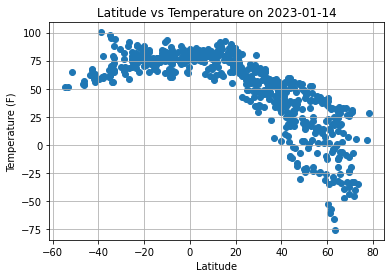

In [12]:
#format the max date in the dataset as "runDate" for graph titles
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../Starter_code/output_data/Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

#### Latitude Vs. Humidity

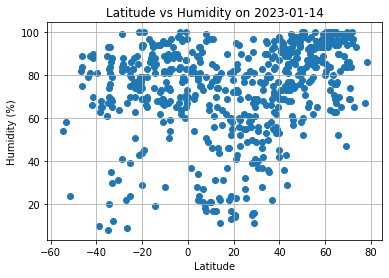

In [13]:
#set data to plot; retain Latitude from previous plot as "x"
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../Starter_code/output_data/Latitude vs Humidity on {runDate}.png')
plt.show()

#### Latitude Vs. Cloudiness

<function matplotlib.pyplot.show(close=None, block=None)>

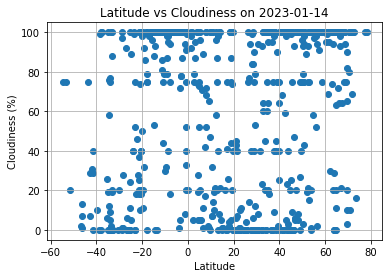

In [14]:
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../Starter_code/output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show

#### Latitude vs. Wind Speed Plot

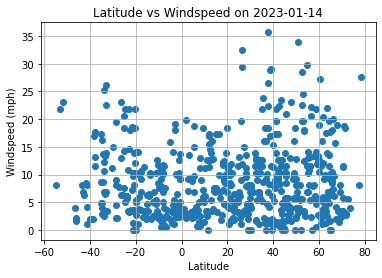

In [15]:
ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../Starter_code/output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
# Display sample data
Northern_DF.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
2,dikson,RU,-34.76,93,16,3.87,73.5069,80.5464,1673721221
7,portland,US,50.58,91,75,11.50,45.5234,-122.6762,1673721151
10,tiszasuly,HU,40.01,88,20,2.98,47.3833,20.4000,1673721223
11,tuktoyaktuk,CA,-11.20,84,20,6.91,69.4541,-133.0374,1673721223
12,leningradskiy,RU,-23.73,100,82,3.29,69.3833,178.4167,1673721223


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]
# Display sample data
Southern_DF.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,airai,TL,60.39,88,100,1.68,-8.9266,125.4092,1673721221
1,mataura,NZ,54.32,84,7,1.54,-46.1927,168.8643,1673721221
3,luderitz,NA,68.58,67,0,23.17,-26.6481,15.1594,1673721221
4,mount gambier,AU,59.23,65,100,13.18,-37.8333,140.7667,1673721131
5,bambous virieux,MU,79.05,78,40,10.36,-20.3428,57.7575,1673721222


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8190455119543304
y = -1.43x + 94.07


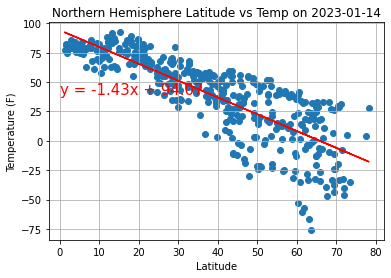

In [19]:
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../Starter_code/output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

Response: r square being negative means the variability in the outcome data cannot be explained by the model to almost any degree. Reliabily of data very low.

The r-square is 0.4423276486888299
y = 0.32x + 80.95


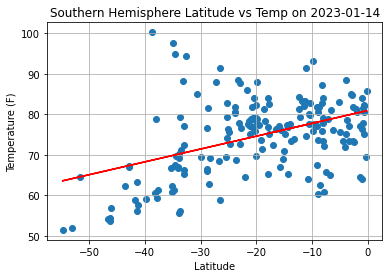

In [20]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../Starter_code/output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

Response: R square result indicates 66% of the variability in the outcome data cannot be explained by the model. There is somehwat of a weak relationship between latitude and longitude in this case.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.49257987798223307
y = 0.56x + 51.43


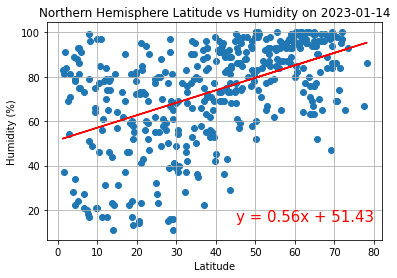

In [21]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../Starter_code/output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

Response: 50% of the variability in the outcome data cannot be explained by the model. Meaning somewhat of a relationship exists between humidity and latitude but not strong.

The r-square is 0.2361793040041582
y = 0.35x + 80.15


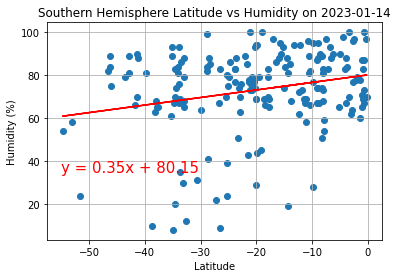

In [22]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../Starter_code/output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

Response: 23% of the variability in the outcome data can be explained by the model. Almost no relationship exists between humidity and latitude.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.33387412853058507
y = 0.7x + 31.42


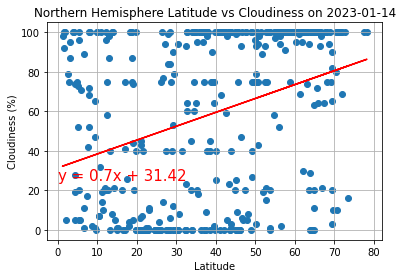

In [23]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../Starter_code/output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

Response: 76% of the variability in the outcome data can't be explained by the model. Almost no relationship exists between cloudiness and latitude.

The r-square is 0.4593831227946152
y = 1.42x + 87.81


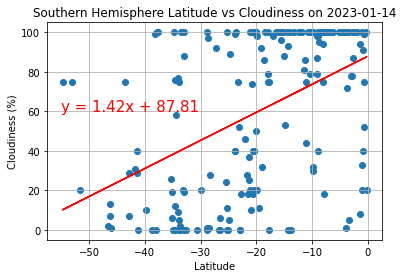

In [24]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../Starter_code/output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

Response: 55% of the variability in the outcome data can't be explained by the model. Weak relationship exists between cloudiness and latitude.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.08747229772016281
y = 0.03x + 7.61


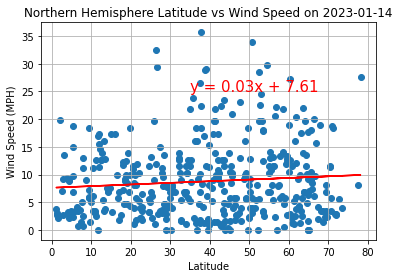

In [25]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../Starter_code/output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

Response: relationship between wind speed and latitude almost inexistent and can only be explained by less than 10% of the data.

The r-square is -0.21248715932177692
y = -0.1x + 6.17


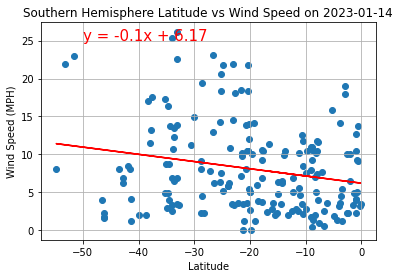

In [26]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../Starter_code/output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Result: reliabily of data very low due to negative r square value. Meaninf it is more porbable other factors have infulence or relationship to Wind speed and latitude 